In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')



In [2]:
df = pd.read_csv('../Dataset/kc/kc_final.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df['sqft_basement'] = np.ceil(df['sqft_basement'].apply(lambda x: float(x/1000)))

In [6]:
# convert df['sqft_basement'] to int
df['sqft_basement'] = df['sqft_basement'].astype(int)

In [7]:
df['sqft_basement'].unique()

array([0, 1, 2, 3, 4, 5])

In [8]:
df['yr_renovate_to_now'] = df['yr_renovated']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovate_to_now
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


dibagi per 20 tahun

In [9]:
df['yr_renovate_to_now'] = df['yr_renovate_to_now'].apply(lambda x: 2024-x if x!=0 else 0)
df['yr_renovate_to_now'].unique()

array([ 0, 33, 22, 14, 25, 32, 11, 30, 46, 19, 16, 21, 40, 70, 10, 13, 50,
       41, 79, 34, 36, 67, 47, 43, 29, 24, 26, 54, 35, 20, 38, 15, 17, 37,
       51, 18, 39, 23, 44, 53, 45, 27, 74, 55, 76,  9, 56, 12, 61, 73, 31,
       62, 28, 52, 71, 69, 42, 68, 84, 48, 78, 49, 66, 60, 65, 64, 57, 59,
       90, 80], dtype=int64)

In [10]:
df['yr_renovate_to_now'] = df['yr_renovate_to_now'].apply(lambda x: (int(x//20)+1) if x!=0 else 0)

In [11]:
df['yr_renovate_to_now'].value_counts()

yr_renovate_to_now
0    20699
2      409
1      320
3      138
4       43
5        4
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21613 non-null  int64  
 1   date                21613 non-null  object 
 2   price               21613 non-null  float64
 3   bedrooms            21613 non-null  int64  
 4   bathrooms           21613 non-null  float64
 5   sqft_living         21613 non-null  int64  
 6   sqft_lot            21613 non-null  int64  
 7   floors              21613 non-null  float64
 8   waterfront          21613 non-null  int64  
 9   view                21613 non-null  int64  
 10  condition           21613 non-null  int64  
 11  grade               21613 non-null  int64  
 12  sqft_above          21613 non-null  int64  
 13  sqft_basement       21613 non-null  int32  
 14  yr_built            21613 non-null  int64  
 15  yr_renovated        21613 non-null  int64  
 16  zipc

### Split the date into month and year

In [13]:
df['month'] = df['date'].apply(lambda x: int(x.split('T')[0].split('-')[1]))
df['year'] = df['date'].apply(lambda x: int(x.split('T')[0].split('-')[0]))

### Buang outlier

<Axes: xlabel='price', ylabel='Count'>

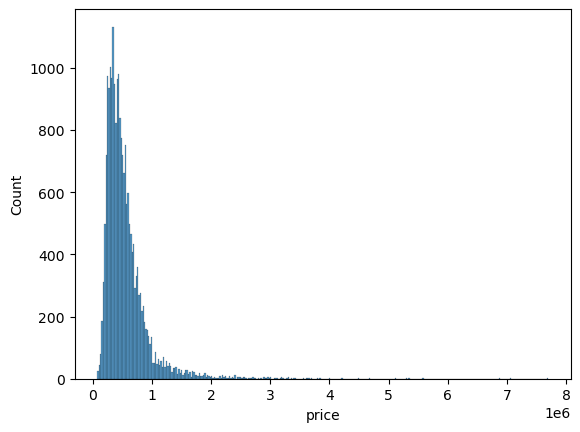

In [14]:
sns.histplot(df['price'])

In [15]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovate_to_now,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2,2015
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,0,5,2014
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0,6,2014
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0,1,2015
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,0,4,2015
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0,3,2015


In [16]:
#Remove outlier method 1 (quantile method)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

#Outliernya disini
outliers = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]
print(outliers.shape, df.shape)
print(outliers.index)

#Ini baru ngapus dari datanya, ini yang gua pake sih, kalo kalian pengen input yg sama
df.drop(outliers.index, inplace=True)
print(df.shape)


(1146, 24) (21613, 24)
Index([    5,    21,    49,    69,   125,   153,   216,   246,   269,   270,
       ...
       21525, 21530, 21532, 21540, 21551, 21568, 21576, 21590, 21597, 21600],
      dtype='int64', length=1146)
(20467, 24)


<Axes: xlabel='price', ylabel='Count'>

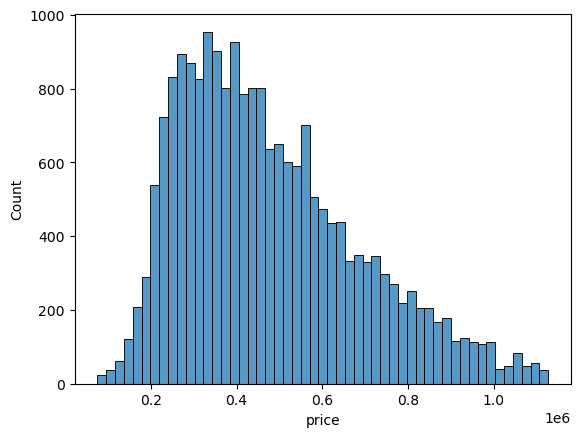

In [17]:
sns.histplot(df['price'])

## Split numerical data and ordinal data

In [40]:
# Inisiasi permisahan
numerical_data = df[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built','sqft_living15','sqft_lot15','month','year']]
ordinal_data = df[['bathrooms','view','condition', 'grade', 'sqft_basement', 'yr_renovated','waterfront']]
geospatial_data = df[['lat', 'long','zipcode']] #Consider this as numerical data

# waterfront dijadikan ordinal dengan asumsi karena hanya 2 data. 0 = tidak ada waterfront, 1 = ada waterfront

label = df['price'] # Target

### Standarisasi data

In [41]:
# make numerical_data and ordinal_data to be one dataframe
data = pd.concat([numerical_data, ordinal_data, label], axis=1)
data.head()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaler.fit(numerical_data)
# scaler.fit(ordinal_data)

data_scaled = scaler.fit_transform(data)


data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()



,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,month,year,bathrooms,view,condition,grade,sqft_basement,yr_renovated,waterfront,price
0,-0.361227,-1.026772,-0.223404,-0.886437,-0.726449,-0.718622,-0.542219,-0.946884,-0.256127,1.097518,-0.690123,-1.477242,-0.269401,-0.627864,-0.510564,-0.718622,-0.197177,-0.054675,-1.224213
1,-0.361227,0.767205,-0.183712,0.975690,0.634790,0.870577,-0.679394,-0.377702,-0.181178,1.739068,-0.690123,0.278650,-0.269401,-0.627864,-0.510564,0.870577,5.059556,-0.054675,0.292828
2,-1.456682,-1.555931,-0.114948,-0.886437,-1.290195,-0.718622,-1.296682,1.297321,-0.165238,-1.468681,1.449017,-1.477242,-0.269401,-0.627864,-1.472874,-0.718622,-0.197177,-0.054675,-1.425301
3,0.734229,-0.020080,-0.239610,-0.886437,-0.905198,0.870577,-0.199281,-0.914360,-0.280620,1.739068,-0.690123,1.332186,-0.269401,2.462312,-0.510564,0.870577,-0.197177,-0.054675,0.609578
4,-0.361227,-0.381457,-0.162818,-0.886437,-0.038955,-0.718622,0.555181,-0.198816,-0.186302,-1.468681,1.449017,-0.072528,-0.269401,-0.627864,0.451745,-0.718622,-0.197177,-0.054675,0.158449


## Look for the data Correlation

In [43]:
data1 = pd.concat([numerical_data, label], axis=1)

<Axes: >

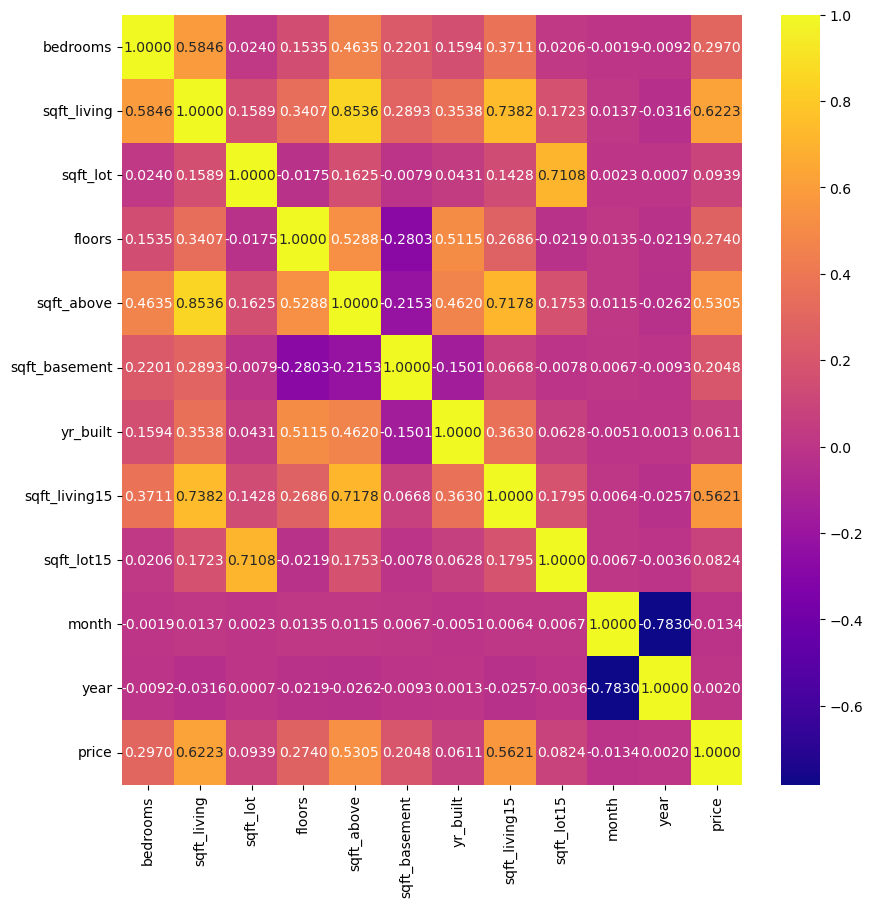

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(data1.corr(method="pearson"), annot=True, cmap='plasma', fmt='.4f')

In [45]:
data2 = pd.concat([ordinal_data, label], axis=1)


<Axes: >

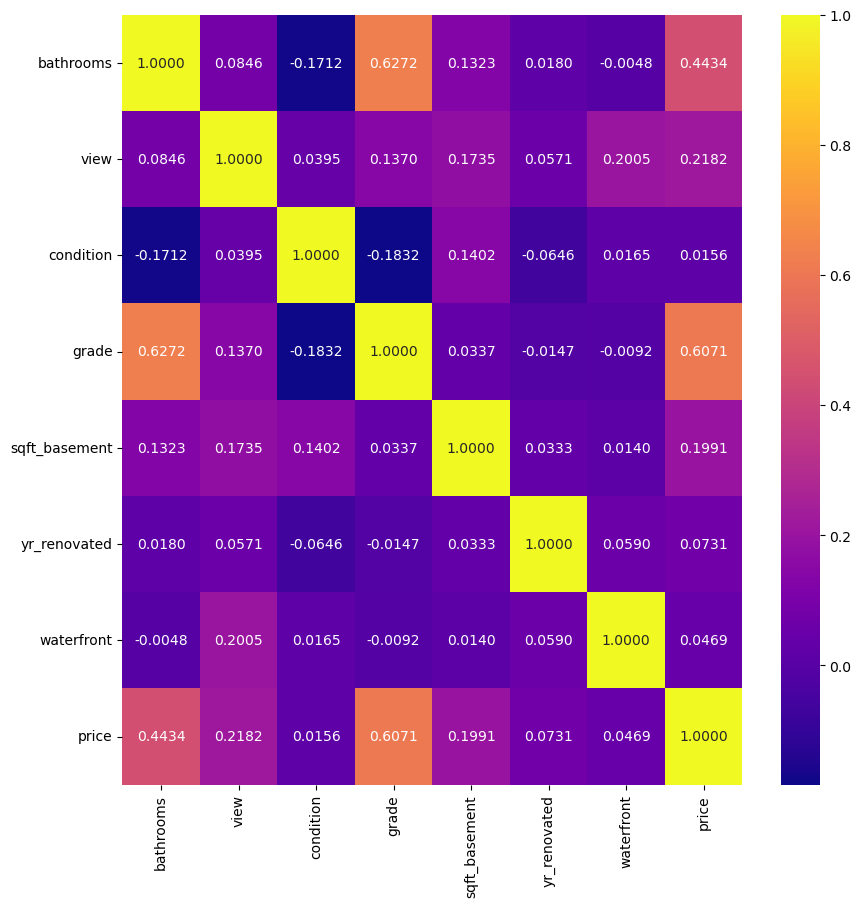

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(data2.corr(method="spearman"), annot=True, cmap='plasma', fmt='.4f')


<Axes: >

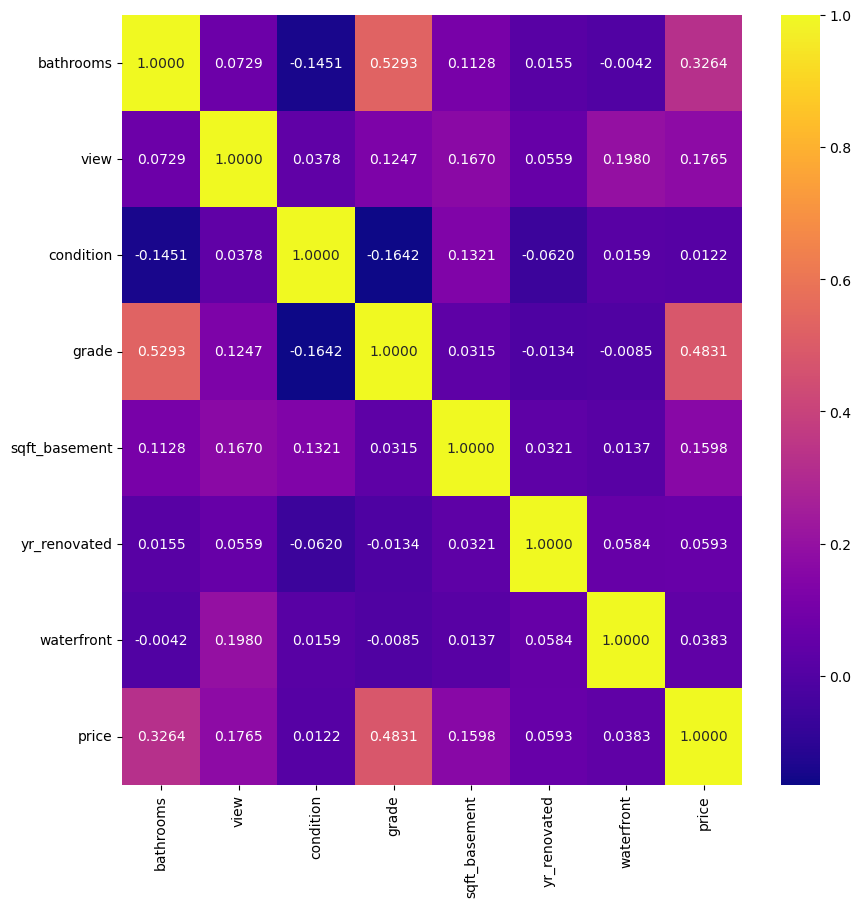

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(data2.corr(method="kendall"), annot=True, cmap='plasma', fmt='.4f')


## Visualize the price distribution

In [50]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd

<Axes: xlabel='long', ylabel='lat'>

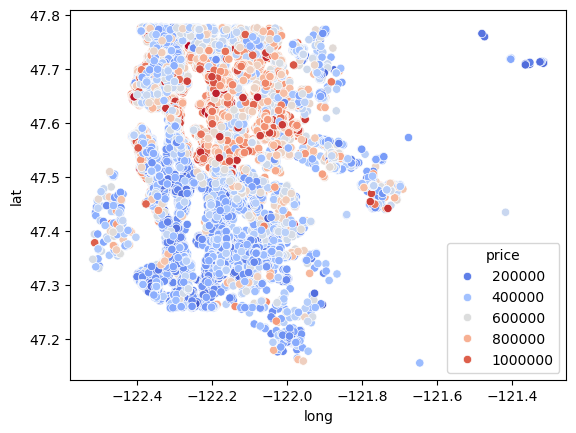

In [61]:
sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='coolwarm' )

In [71]:
shapefile = gpd.read_file('../Dataset/King County/Courts/King_County_District_Courts___juddst_area.shp')

<Axes: >

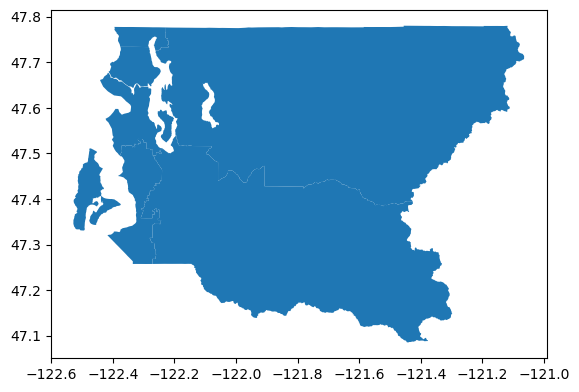

In [72]:
shapefile.plot()

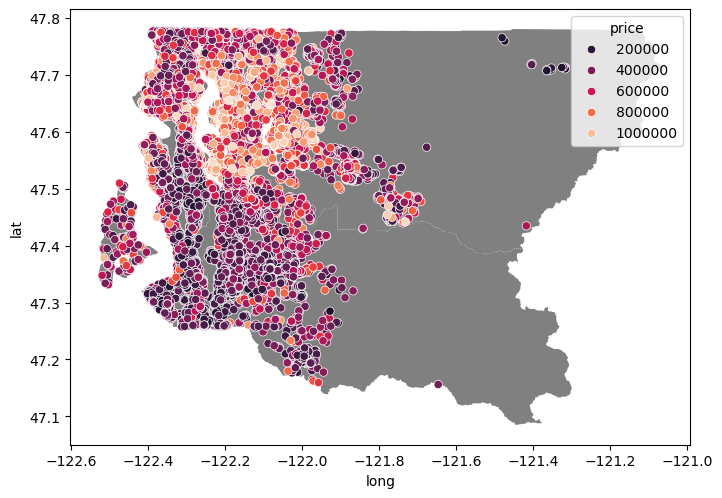

In [80]:
# overlay the sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='coolwarm' ) on top of the shapefile
fig, ax = plt.subplots(figsize=(8,8))
shapefile.plot(ax=ax, color='grey')

sns.scatterplot(x="long", y="lat", hue="price", data=df, palette='rocket', ax=ax)

plt.show()




In [51]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")



<Axes: >

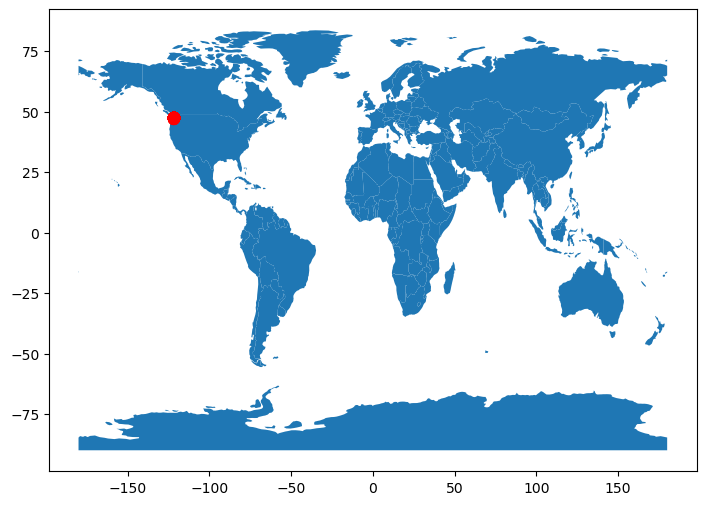

In [52]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red', markersize=50)

# PCA & MODEL

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(r2)



0.6609226584659063


In [54]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16373, 18), (4094, 18), (16373,), (4094,))

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MSE: 0.32136154825883967
MAE: 0.4329260553126533
R2: 0.6649609912519165


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16, random_state=0)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
pca_data.shape


(20467, 16)

In [57]:
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    print(f'PCA {data_scaled.columns[i]}: {explained_variance}')

PCA bedrooms: 0.27400881573844754
PCA sqft_living: 0.1370521241194584
PCA sqft_lot: 0.09402652317901462
PCA floors: 0.09135724053530983
PCA sqft_above: 0.06933774599312438
PCA sqft_basement: 0.059034357115845884
PCA yr_built: 0.05468282459270544
PCA sqft_living15: 0.04288336213476028
PCA sqft_lot15: 0.03597507420184782
PCA month: 0.03305295610641527
PCA year: 0.026394805065898887
PCA bathrooms: 0.017190436881233142
PCA view: 0.015218821041008888
PCA condition: 0.014129829072944619
PCA grade: 0.013033490379553208
PCA sqft_basement: 0.011453272124332689


In [58]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data_scaled.drop('price', axis=1)
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)



0.6522671925456147


In [59]:
# X_var = data_scaled.drop('price', axis=1)
# print(X_var.columns)
# y_var = data_scaled['price']
# print(y_var[0])
X_var = df.drop(labels=['price','date'], axis=1)
y_var = df['price']

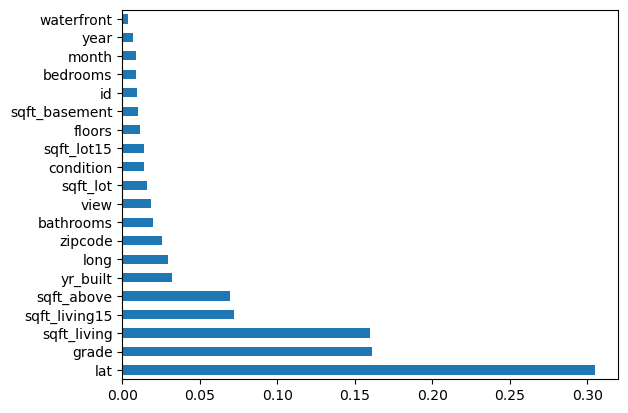

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_var,y_var)

feat_importances = pd.Series(model.feature_importances_, index = X_var.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()